In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.shape

(506, 13)

In [7]:
X = df

In [8]:
y = boston_data.target

## Statsmodels

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We need to add a constant term to allow the bias to be estimated on its own.

In [10]:
X_constant = sm.add_constant(X)

In [12]:
X_constant.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
model = sm.OLS(y, X_constant)

In [15]:
lr = model.fit()

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          6.95e-135
Time:                        01:10:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
form_lr = smf.ols(formula='y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df)

In [22]:
mlr = form_lr.fit()

In [23]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          5.74e-137
Time:                        01:19:57   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.3694      5.069      7.176      0.000        26.411    46.328
CRIM          -0.1076      0.033     -3.296      0.001        -0.172    -0.043
ZN             0.0458      0.014      3.387      0.001         0.019     0.072
CHAS           2.7212      0.854      3.185      0.002         1.043     4.400
NOX          -17.3956      3.536     -4.920      0.000       -24.343   -10.448
RM             3.7966      0.406      9.343      0.000         2.998     4.595
DIS           -1.4934      0.186     -8.039      0.000        -1.858    -1.128
RAD            0.2991      0.063      4.719      0.000         0.175     0.424
TAX           -0.0118      0.003     -3.488      0.001        -0.018    -0.005
PTRATIO       -0.9471      0.129     -7.337      0.000        -1.201    -0.693
B              0.0094      0.003      3.508      0.000         0.004     0.015
LSTAT         -0.5232      0.047    -11.037      0.000        -0.616    -0.430
==============================================================================
Omnibus:                      178.444   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.944
Skew:                           1.524   Prob(JB):                    1.31e-171
Kurtosis:                       8.295   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Correlation Matrix

In [25]:
pd.options.display.float_format= '{:,.4}'.format

In [26]:
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,-0.1995,0.4045,-0.0553,0.4175,-0.2199,0.3508,-0.3779,0.622,0.5796,0.2883,-0.3774,0.4522
ZN,-0.1995,1.0,-0.5338,-0.0427,-0.5166,0.312,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.413
INDUS,0.4045,-0.5338,1.0,0.06294,0.7637,-0.3917,0.6448,-0.708,0.5951,0.7208,0.3832,-0.357,0.6038
CHAS,-0.0553,-0.0427,0.06294,1.0,0.0912,0.09125,0.08652,-0.09918,-0.007368,-0.03559,-0.1215,0.04879,-0.05393
NOX,0.4175,-0.5166,0.7637,0.0912,1.0,-0.3022,0.7315,-0.7692,0.6114,0.668,0.1889,-0.3801,0.5909
RM,-0.2199,0.312,-0.3917,0.09125,-0.3022,1.0,-0.2403,0.2052,-0.2098,-0.292,-0.3555,0.1281,-0.6138
AGE,0.3508,-0.5695,0.6448,0.08652,0.7315,-0.2403,1.0,-0.7479,0.456,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3779,0.6644,-0.708,-0.09918,-0.7692,0.2052,-0.7479,1.0,-0.4946,-0.5344,-0.2325,0.2915,-0.497
RAD,0.622,-0.3119,0.5951,-0.007368,0.6114,-0.2098,0.456,-0.4946,1.0,0.9102,0.4647,-0.4444,0.4887
TAX,0.5796,-0.3146,0.7208,-0.03559,0.668,-0.292,0.5065,-0.5344,0.9102,1.0,0.4609,-0.4418,0.544


In [28]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.622,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6644,0.0,0.0,0.0,0.0,0.0
INDUS,0.0,0.0,1.0,0.0,0.7637,0.0,0.6448,-0.708,0.0,0.7208,0.0,0.0,0.6038
CHAS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOX,0.0,0.0,0.7637,0.0,1.0,0.0,0.7315,-0.7692,0.6114,0.668,0.0,0.0,0.0
RM,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6138
AGE,0.0,0.0,0.6448,0.0,0.7315,0.0,1.0,-0.7479,0.0,0.0,0.0,0.0,0.6023
DIS,0.0,0.6644,-0.708,0.0,-0.7692,0.0,-0.7479,1.0,0.0,0.0,0.0,0.0,0.0
RAD,0.622,0.0,0.0,0.0,0.6114,0.0,0.0,0.0,1.0,0.9102,0.0,0.0,0.0
TAX,0.0,0.0,0.7208,0.0,0.668,0.0,0.0,0.0,0.9102,1.0,0.0,0.0,0.0


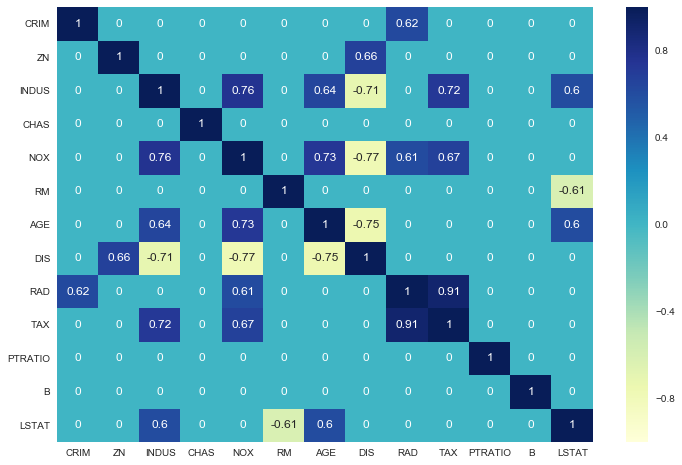

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

In [30]:
# Detecting collinearity with Eigenvectors

In [31]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [34]:
pd.Series(eigenvalues).sort_values()

8    0.06352
10    0.1692
11    0.1862
12    0.2203
9     0.2774
7     0.3965
6      0.539
5     0.6597
4     0.8346
3     0.8578
2      1.241
1      1.432
0      6.123
dtype: float64

In [35]:
# Smaller values indicate collinearity 

In [36]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9     0.7202
8     0.6334
2     0.2513
1     0.0809
5    0.04581
0    0.04553
4    0.04389
6    0.03871
3     0.0359
12   0.02477
10   0.02351
7    0.01828
11   0.00485
dtype: float64

In [38]:
print(df.columns[9], df.columns[8], df.columns[2])

TAX RAD INDUS


These are the factors causing multicollinearity.

In [39]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)),
                     columns=['coefficient', 'name']).set_index('name')

In [52]:
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
NOX,17.8
RM,3.805
CHAS,2.689
DIS,1.476
PTRATIO,0.9535
LSTAT,0.5255
RAD,0.3057
CRIM,0.1072
ZN,0.0464


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
Stand_coef_linear_reg = make_pipeline(scaler, model)

In [42]:
Stand_coef_linear_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [46]:
result = pd.DataFrame(list(zip(Stand_coef_linear_reg.steps[1][1].coef_, df.columns)),
                     columns=['coefficient', 'name']).set_index('name')

In [47]:
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.749
DIS,3.104
RM,2.671
RAD,2.659
TAX,2.076
PTRATIO,2.062
NOX,2.06
ZN,1.081
CRIM,0.9204
